# <center>LAB 3 - Linear Regression

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **4 BSC DS** <br>

---------------
    
<u>**Objectives**</u>  
- Import the Dataset that you created as part of LAB 1 (Exported Dataset).
- Perform basic EDA on the same Correlation Matrix , 2 Catplots, 1 Regplot.
- Perform Linear Regression with the SKLearn Library
- Use different variations of Linear Regression as available in statsmodels library
- Compare the results of various models
- There is some relation between price and the number of people actually buy cars even if the prices are high but they are durable
- Car Production from each brand
    
-----------------
    
<u>**Problem Statement**</u>  
- To perform EDA and apply Feature Enginnering techniques on the dataset and obtain new insigths from the dataset.
    
-------------------
    
<u>**Methods**</u> 
- Reading the data through pandas library using **pd.read_csv()**
- df.info() to get description of the dataset.
- 
- Understand the significance of Boxplot
------------------
    
<u>**Observations**</u>
- Importing the dataset from csv file in the dataset.
- 
    
------------------
 
<u>**Results**</u>
- Summation of all the values in each different kind of fuel would give us total manual and automated cars respectively.
- Manual cars are mostly petrol based
- Automatic cars mostly run with diesel 
- With automatic cars cng, electric and LPG has been used or bought by people till now
- There is no electric car in manual model


------------------
 
<u>**Learnings & Reflection**</u>
- Uses of Boxplot and other visualizations of factorPlot.

------------------

<u>**References**</u> <br> 
1. [Pandas Documendation](https://pandas.pydata.org/)<br>

***************
    
[Github Link](https://github.com/Krishnaa-tech/ML-Projects.git)<br>
------------------

<u><center>**Completion Status**</u>

| Question Number | Status |
|---|---|
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |
| 5 | Completed |

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pickle
import statsmodels.api as sm
%matplotlib inline
df = pd.read_csv("car.csv")
df

,AgeofCar,Price,OdoMeterReading,NoofOwners,CarBrand,0,1,Fuel_LE,DealingType_LE,Owner_LE,OdoMeterReading_Scalar,AgeofCar_SS,price_category
0,8,574998.75,152620,First Owner,Ford,0.0,1.0,1,0,0,0.184254,-0.452973,Non-Luxurious
1,11,656250.00,149000,First Owner,Mahindra,0.0,1.0,1,1,0,0.179766,0.258795,Luxurious
2,9,250000.00,104000,First Owner,Tata,0.0,1.0,1,1,0,0.123976,-0.215717,Non-Luxurious
3,13,437500.00,84000,Third Owner,Toyota,1.0,0.0,4,1,4,0.099181,0.733307,Non-Luxurious
4,12,225000.00,124000,First Owner,Tata,0.0,1.0,1,1,0,0.148772,0.496051,Non-Luxurious
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,9,362500.00,16000,First Owner,Hyundai,0.0,1.0,4,0,0,0.014876,-0.215717,Non-Luxurious
4336,6,625000.00,54000,First Owner,Hyundai,0.0,1.0,4,1,0,0.061988,-0.927485,Non-Luxurious
4337,7,343750.00,164000,First Owner,Maruti,0.0,1.0,4,1,0,0.198363,-0.690229,Non-Luxurious
4338,5,975000.00,36114,First Owner,Honda,0.0,1.0,1,0,0,0.039813,-1.164741,Luxurious


In [2]:
fuel_le = pickle.load(open('fuel_le.pickle', 'rb'))
dealing_le = pickle.load(open('dealing_le.pickle', 'rb'))
stdscalar = pickle.load(open('std_scalar', 'rb'))
owner_le = pickle.load(open('Owner_le.pickle','rb'))
model = pickle.load(open('regressor_model.pickle', 'rb'))

<ipython-input-3-b1c5328e2ffa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


Text(0.5, 1.0, 'HeatMap')

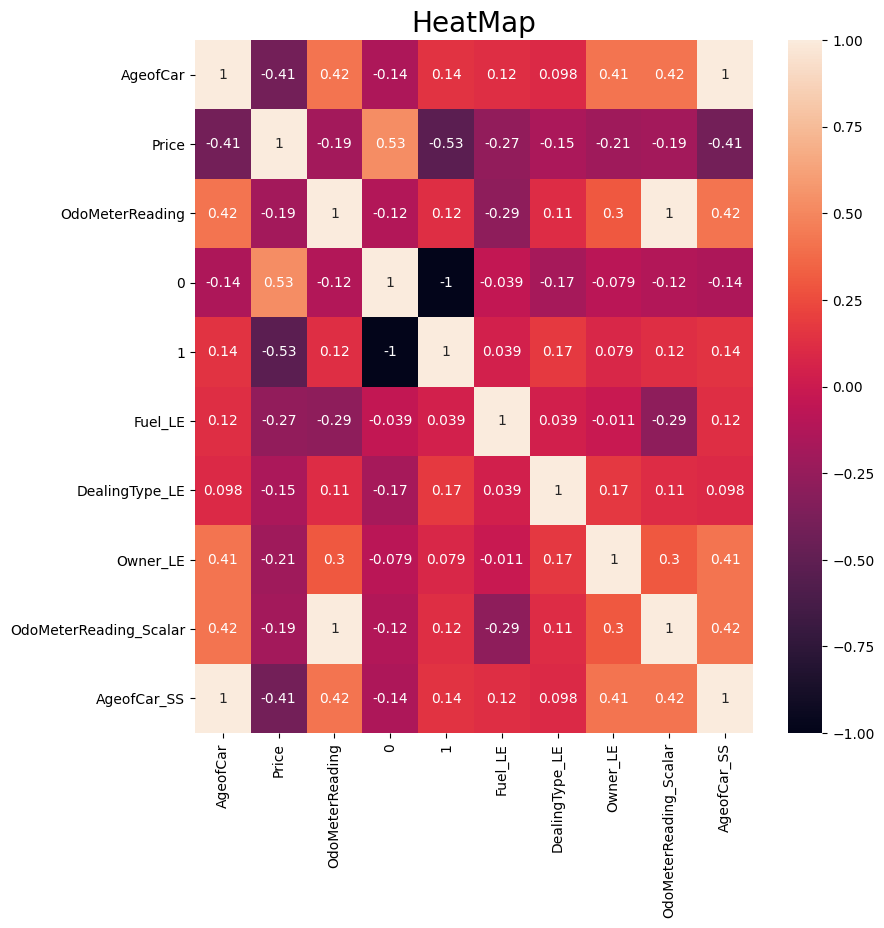

In [3]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot= True)
plt.style.use('fivethirtyeight')
plt.title('HeatMap')

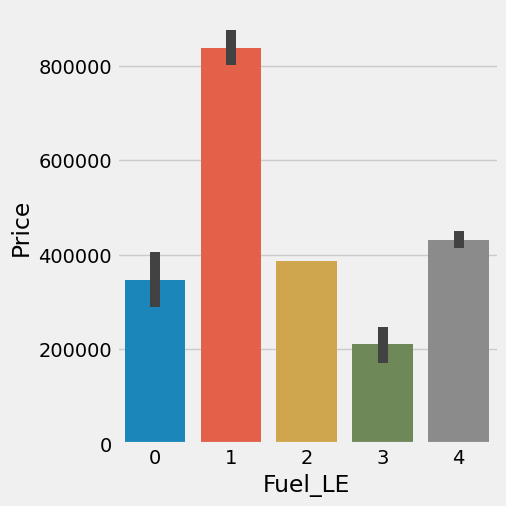

In [4]:
sns.catplot(x="Fuel_LE",y="Price",kind="bar",data=df)

**Observation** - *The relation of price with CNG as 0 , Disel as 1 , Electric as 2 , Petrol as 3 and LPG as 4 where Disel cars are the costliest.*

<AxesSubplot: xlabel='OdoMeterReading_Scalar', ylabel='Price'>

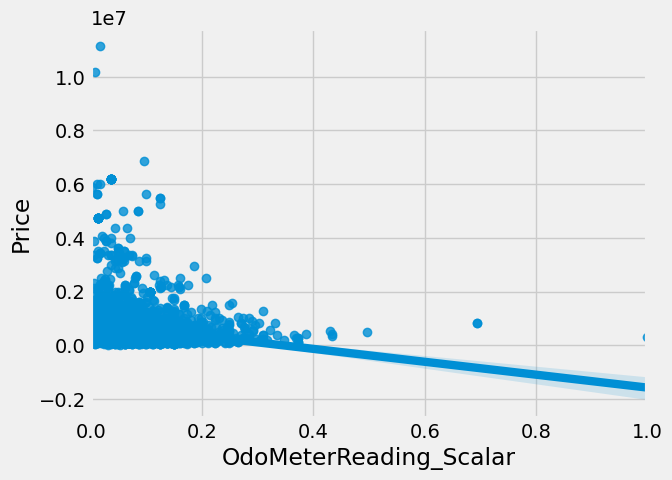

In [5]:
sns.regplot(x="OdoMeterReading_Scalar", y="Price", data=df)

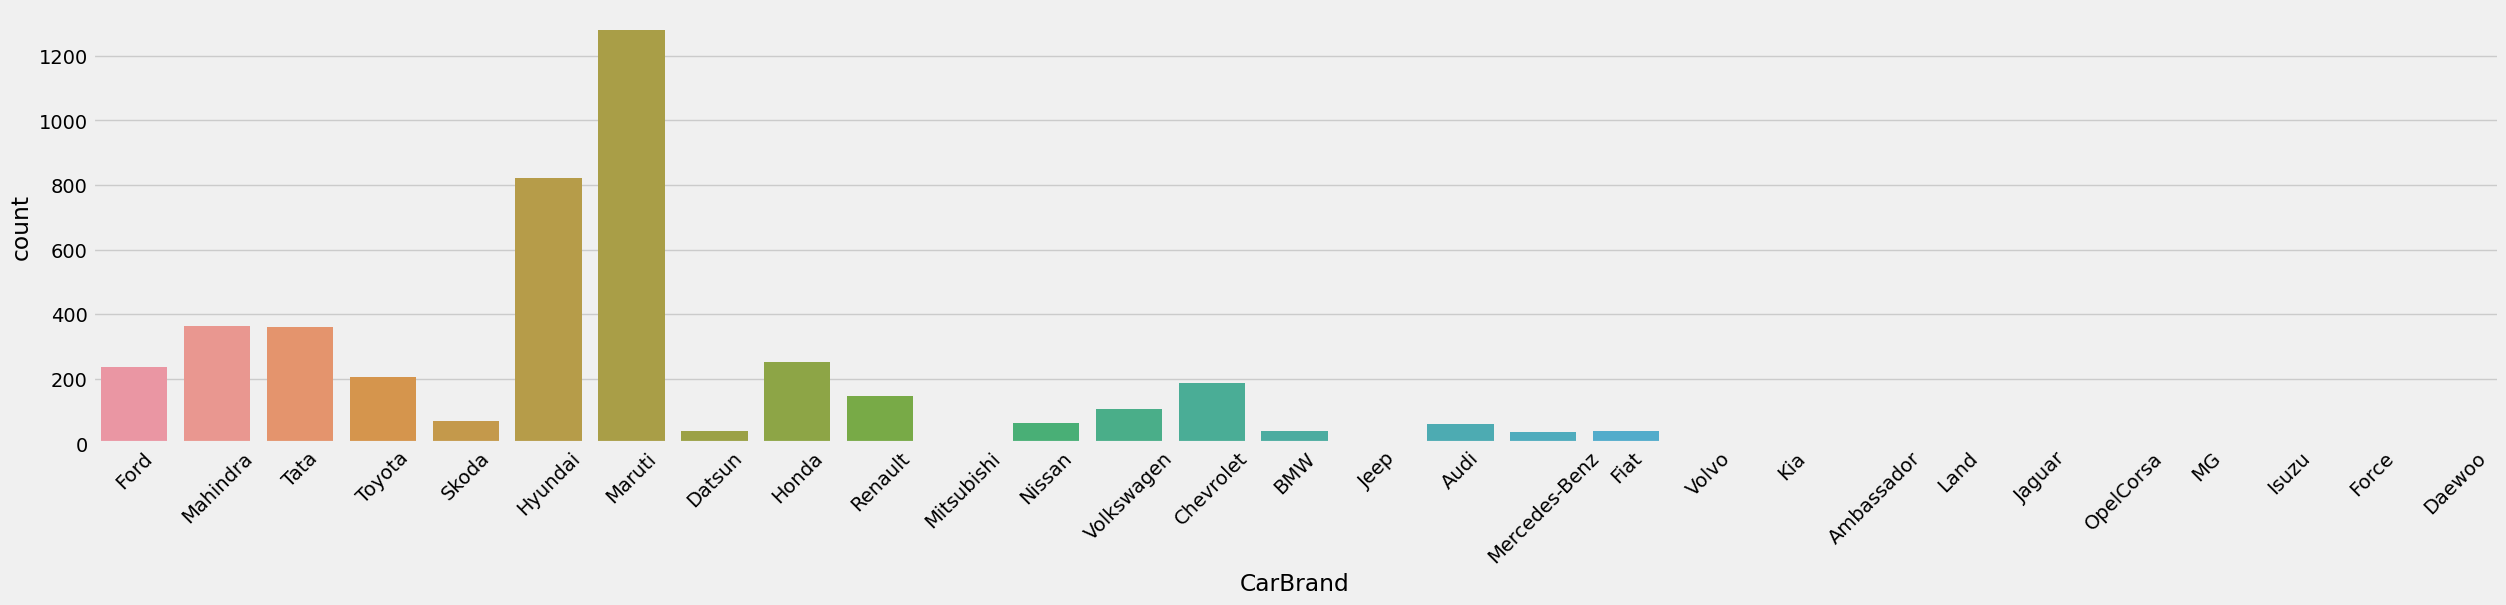

In [6]:
graphs = sns.catplot(x ="CarBrand",kind ="count", data = df,height = 5, aspect = 5)
graphs.set_xticklabels(rotation=45)

**Observation** - *Car Production from each brand*

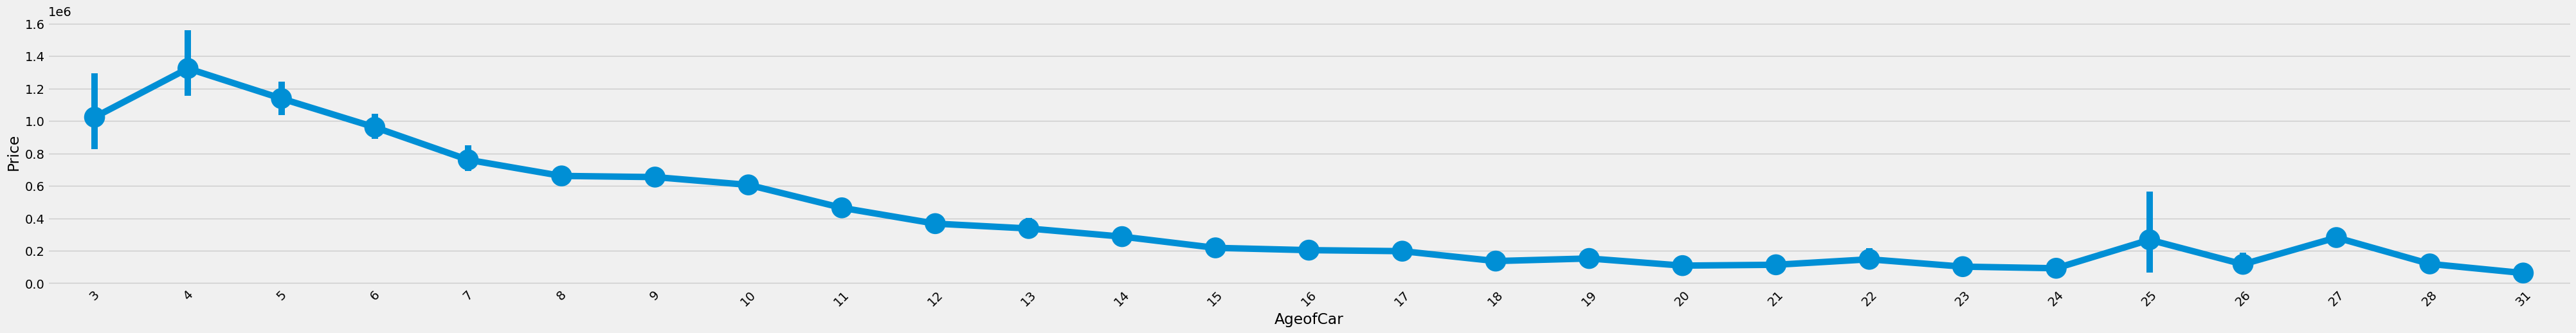

In [7]:
graphs=sns.catplot(x="AgeofCar",y= "Price", kind= "point", data = df,height = 5, aspect = 8)
graphs.set_xticklabels(rotation=45);

**Observation** - *There is some relation between price and the number of people actually buy cars even if the prices are high but they are durable*

In [8]:
def predict_price(fuel,dealer,age,owner):
    
    fuel_ = fuel_le.transform([fuel])[0]
    dealer_ = dealing_le.transform([dealer])[0]
    owner_ = owner_le.transform([owner])[0]
    age_ = stdscalar.transform([[age]])[0]

    #label encoding for modelling
    x = [age_,dealer_,fuel_,owner_]
    

    #predicting price
    predicted_Price = model.predict([x])[0]
   

    ##inverse transforming the price back to its orginal value
    #Price = pricing.inverse_transform([[predicted_Price]])[0][0]
    return int(predicted_Price[0])

In [9]:
print("----------------To predict price of the car------------------")
owner = input("No.of owners(First Owner, Third Owner, Second Owner,Fourth & Above Owner, Test Drive Car) : ")
fuel = input("Fuel type of the car(Diesel, Petrol, CNG, Electric, LPG) : ")
dealer = input("Type of Dealer(Broker, Direct Owner, Trustmark Broker): ")
age = int(input("Age period:"))
predict_price(fuel,dealer,age,owner)

----------------To predict price of the car------------------
No.of owners(First Owner, Third Owner, Second Owner,Fourth & Above Owner, Test Drive Car) : First Owner
Fuel type of the car(Diesel, Petrol, CNG, Electric, LPG) : LPG
Type of Dealer(Broker, Direct Owner, Trustmark Broker): Broker
Age period:10


C:\Users\goyal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\goyal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\goyal\anaconda3\lib\site-packages\sklearn\utils\validation.py:856: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)


578366

C:\Users\goyal\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\goyal\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


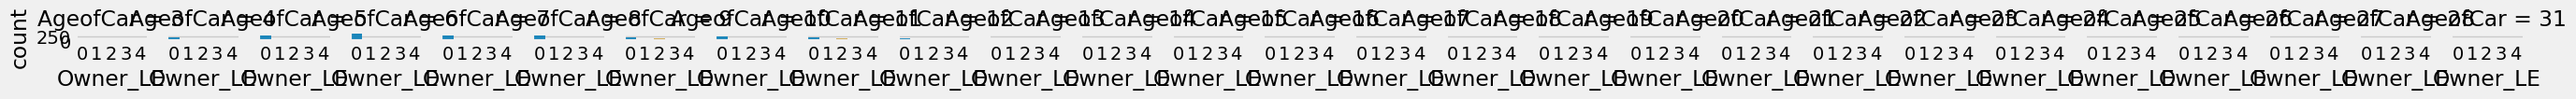

In [10]:
sns.factorplot(x="Owner_LE",col="AgeofCar",kind="count",data=df, size= 1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [13]:
X = df.iloc[:,[7,8,9,10,11]]
y = df['Price']

In [14]:
X

,Fuel_LE,DealingType_LE,Owner_LE,OdoMeterReading_Scalar,AgeofCar_SS
0,1,0,0,0.184254,-0.452973
1,1,1,0,0.179766,0.258795
2,1,1,0,0.123976,-0.215717
3,4,1,4,0.099181,0.733307
4,1,1,0,0.148772,0.496051
...,...,...,...,...,...
4335,4,0,0,0.014876,-0.215717
4336,4,1,0,0.061988,-0.927485
4337,4,1,0,0.198363,-0.690229
4338,1,0,0,0.039813,-1.164741


In [15]:
def performSKLearnLR(X, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = r2_score(y_pred, y_test)
    return acc

In [16]:
results_dataframe = pd.DataFrame(columns = ['Model', 'Random State', 'NoOfFeatures', 'Accuracy'])
random_states = [10,20,30,40,50,60,70,80]
no_of_features = [1,3,7,8,13,5,4]

for no in no_of_features:
    for r_s in random_states:
        acc = performSKLearnLR(X.iloc[:, :no], r_s)
        result = {}
        result['Model'] = "Linear Regression in SKLearn"
        result['Random State'] = r_s
        result['NoOfFeatures'] = no
        result['Accuracy'] = acc
        results_dataframe = results_dataframe.append(result, ignore_index = True)


<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15

<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15060e882345>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_dataframe = results_dataframe.append(result, ignore_index = True)
<ipython-input-16-15

In [17]:
results_dataframe

,Model,Random State,NoOfFeatures,Accuracy
0,Linear Regression in SKLearn,10,1,-10.248476
1,Linear Regression in SKLearn,20,1,-10.402996
2,Linear Regression in SKLearn,30,1,-9.301920
3,Linear Regression in SKLearn,40,1,-14.033332
4,Linear Regression in SKLearn,50,1,-15.555757
5,Linear Regression in SKLearn,60,1,-13.947138
6,Linear Regression in SKLearn,70,1,-13.374919
7,Linear Regression in SKLearn,80,1,-14.227851
8,Linear Regression in SKLearn,10,3,-4.466937
9,Linear Regression in SKLearn,20,3,-4.828220


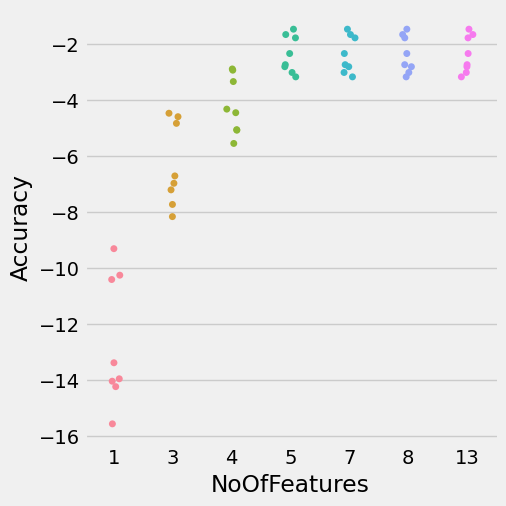

In [18]:
sns.catplot(data = results_dataframe, y = 'Accuracy', x = 'NoOfFeatures')

In [19]:
import statsmodels.api as sm
result = sm.OLS(y, X).fit()

# printing the summary table
print(result.params)
print(result.summary())
print()
print("R2 SQUARE IS: ", result.rsquared)

Fuel_LE                   4.689647e+04
DealingType_LE            1.798566e+05
Owner_LE                  1.398964e+04
OdoMeterReading_Scalar    3.126831e+06
AgeofCar_SS              -3.989419e+05
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.436
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              669.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:09:37   Log-Likelihood:                         -64695.
No. Observations:                4340   AIC:                                  1.294e+05
Df Residuals:                    4335   BIC:                                  1.294e+05
Df Model:                           5                                                 

In [20]:
import statsmodels.api as sm
result = sm.WLS(y, X).fit()
 
# printing the summary table
print(result.params)
print(result.summary())
print()
print("R2 SQUARE IS: ", result.rsquared)

Fuel_LE                   4.689647e+04
DealingType_LE            1.798566e+05
Owner_LE                  1.398964e+04
OdoMeterReading_Scalar    3.126831e+06
AgeofCar_SS              -3.989419e+05
dtype: float64
                                 WLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.436
Model:                            WLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              669.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:09:37   Log-Likelihood:                         -64695.
No. Observations:                4340   AIC:                                  1.294e+05
Df Residuals:                    4335   BIC:                                  1.294e+05
Df Model:                           5                                                 

In [21]:
import statsmodels.api as sm
result = sm.GLS(y, X).fit()
 
# printing the summary table
print(result.params)
print(result.summary())
print()
print("R2 SQUARE IS: ", result.rsquared)

Fuel_LE                   4.689647e+04
DealingType_LE            1.798566e+05
Owner_LE                  1.398964e+04
OdoMeterReading_Scalar    3.126831e+06
AgeofCar_SS              -3.989419e+05
dtype: float64
                                 GLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.436
Model:                            GLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              669.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:09:37   Log-Likelihood:                         -64695.
No. Observations:                4340   AIC:                                  1.294e+05
Df Residuals:                    4335   BIC:                                  1.294e+05
Df Model:                           5                                                 